## Note:
    1. Generally used to remove row if any column as missing values at randon, note random is very importtant.
    2. Ditribution in Missing  Completely Value at Random(MCAR) maintain data distribution before and after removal.


In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt

In [94]:
df = pd.read_csv('data_science_job.csv')

In [95]:
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14.0,NaN,NaN,42.0,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14.0,NaN,NaN,52.0,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,50-99,Pvt Ltd,44.0,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,0.0,500-999,Pvt Ltd,97.0,0.0


In [96]:
df.isnull().mean()*100 # missing values across different columns

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

### CCA can be applied on all have missing value < 5%.

In [97]:
df.shape

(19158, 13)

In [98]:
cols = [val for val in df.columns if df[val].isnull().mean() < 0.05 and df[val].isnull().mean()>0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [99]:
df[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
5596,0.769,no_enrollment,Masters,9.0,50.0
18671,0.884,Part time course,Masters,5.0,23.0
12271,0.624,no_enrollment,Masters,19.0,124.0
1905,0.899,no_enrollment,Masters,16.0,35.0
18548,0.926,no_enrollment,Graduate,13.0,77.0


In [100]:
len(df[cols].dropna()) / len(df) # meaning % of data

0.8968577095730244

In [101]:
row_drop_df = df[cols].dropna()
df.shape,row_drop_df.shape

((19158, 13), (17182, 5))

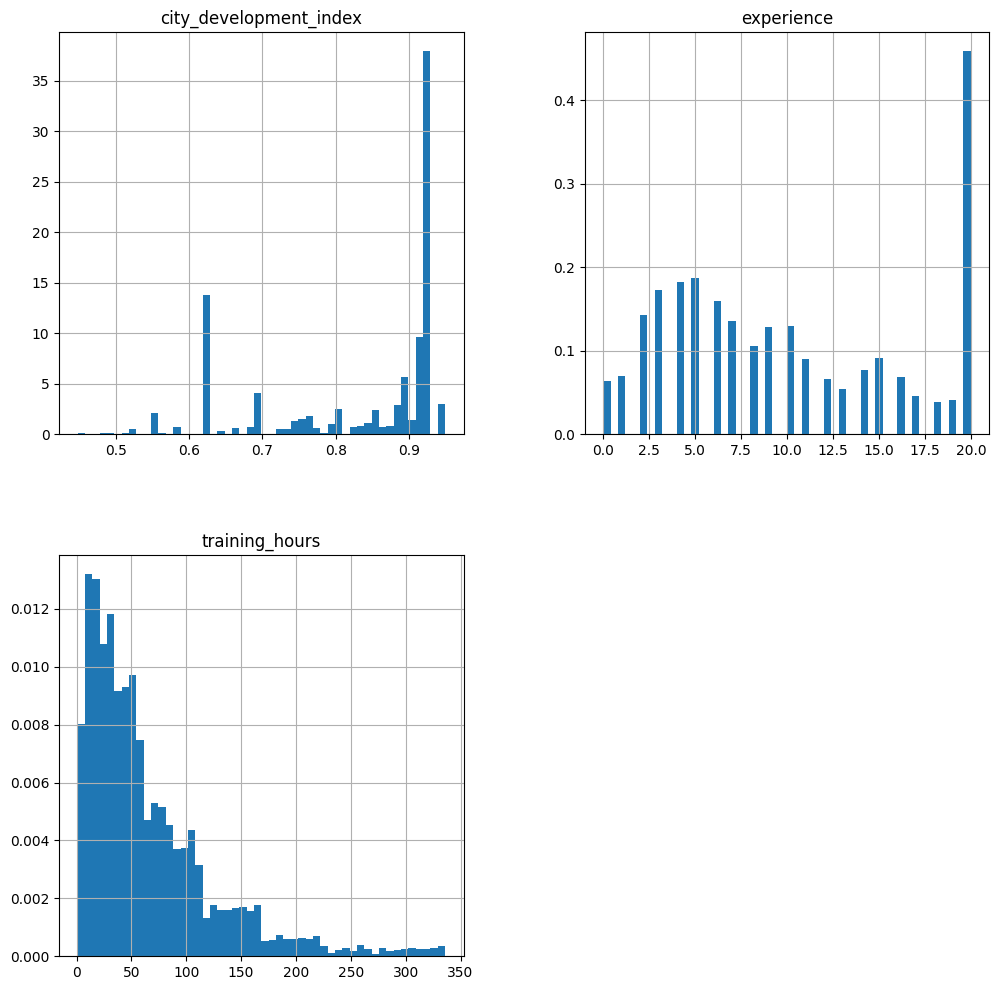

In [102]:
row_drop_df.hist(bins=50,density=True,figsize=(12,12))
plt.show()

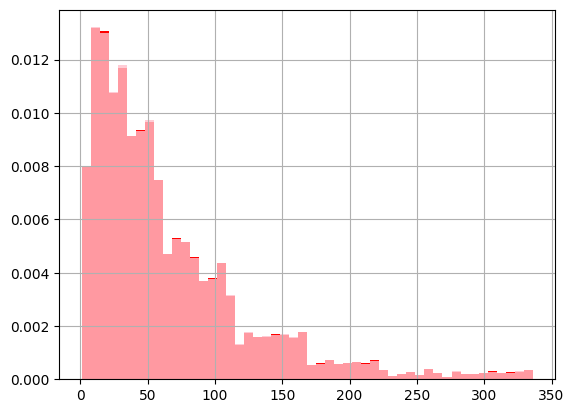

In [103]:

fig = plt.figure()
ax = fig.add_subplot(111)

df['training_hours'].hist(bins=50,ax = ax,density=True,color = 'red')


row_drop_df['training_hours'].hist(bins=50,ax = ax,density=True,color='pink', alpha=0.8)


plt.show() # Here we can compare.

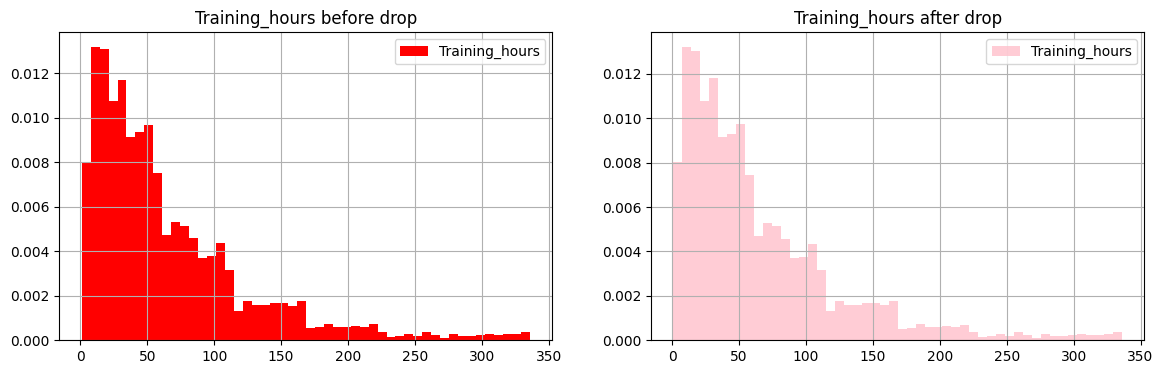

In [104]:
plt.figure(figsize=(14,4))

plt.subplot(121)
df['training_hours'].hist(bins=50,density=True,color = 'red')
plt.title('Training_hours before drop')
plt.legend(['Training_hours'])

plt.subplot(122)
row_drop_df['training_hours'].hist(bins=50,density=True,color='pink', alpha=0.8)
plt.title('Training_hours after drop')
plt.legend(['Training_hours'])
plt.show()

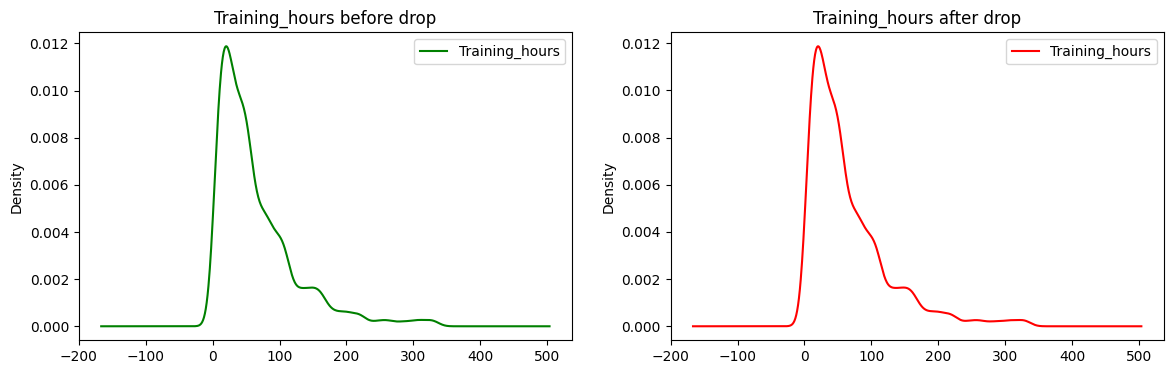

In [105]:
plt.figure(figsize=(14,4))

plt.subplot(121)
df['training_hours'].plot.density(color='green')
plt.title('Training_hours before drop')
plt.legend(['Training_hours'])

plt.subplot(122)
row_drop_df['training_hours'].plot.density(color='red')
plt.title('Training_hours after drop')
plt.legend(['Training_hours'])
plt.show()

<Axes: ylabel='Density'>

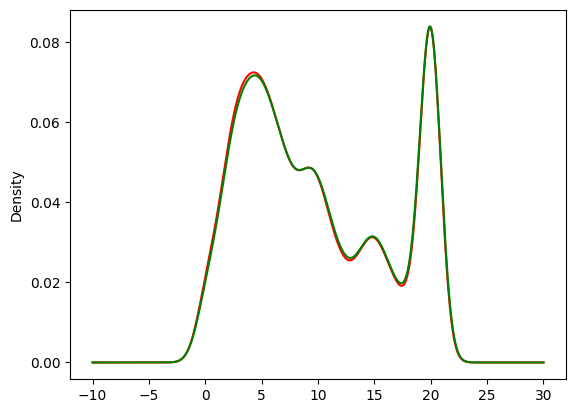

In [114]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['Training_hours'].plot.density(color='red')

row_drop_df['Training_hours'].plot.density(color='green')

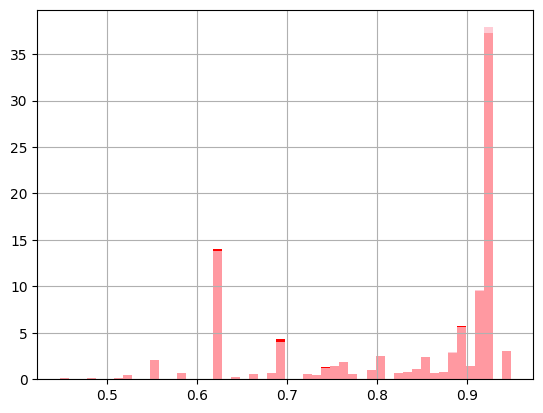

In [106]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['city_development_index'].hist(bins=50,ax = ax,density=True,color = 'red')


row_drop_df['city_development_index'].hist(bins=50,ax = ax,density=True,color='pink', alpha=0.8)


plt.show() # Here we can compare.

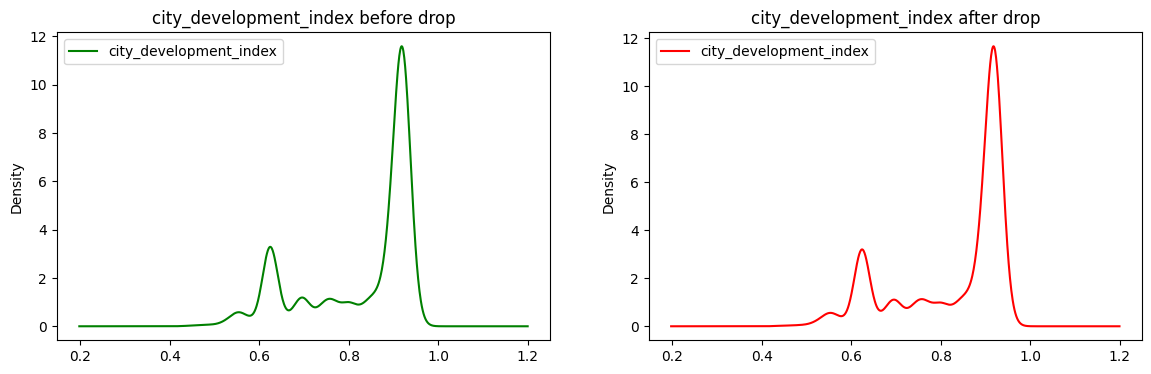

In [107]:
plt.figure(figsize=(14,4))

plt.subplot(121)
df['city_development_index'].plot.density(color='green')
plt.title('city_development_index before drop')
plt.legend(['city_development_index'])

plt.subplot(122)
row_drop_df['city_development_index'].plot.density(color='red')
plt.title('city_development_index after drop')
plt.legend(['city_development_index'])
plt.show() # distribution is same.

<Axes: ylabel='Density'>

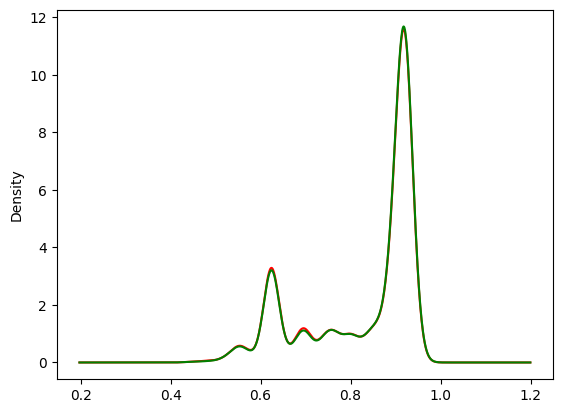

In [115]:
ig = plt.figure()
ax = fig.add_subplot(111)

df['city_development_index'].plot.density(color='red')

row_drop_df['city_development_index'].plot.density(color='green')

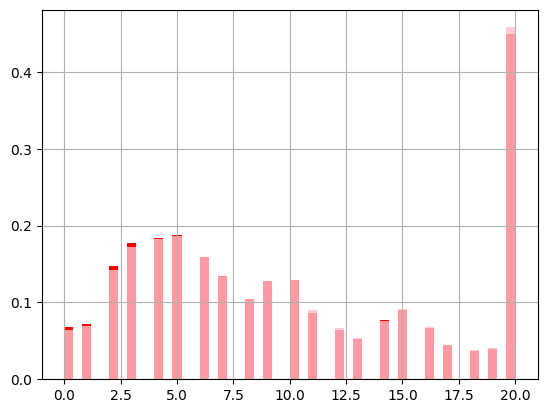

In [108]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['experience'].hist(bins=50,ax = ax,density=True,color = 'red')


row_drop_df['experience'].hist(bins=50,ax = ax,density=True,color='pink', alpha=0.8)


plt.show() # Here we can compare.

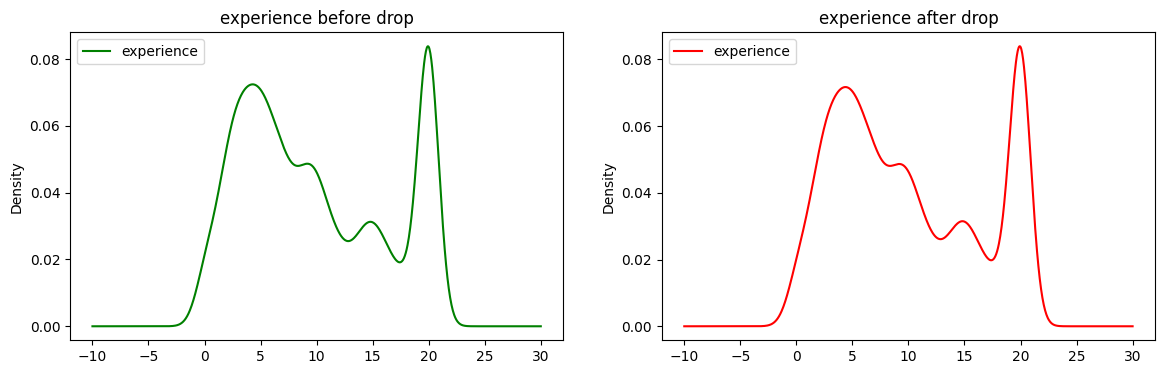

In [109]:
plt.figure(figsize=(14,4))

plt.subplot(121)
df['experience'].plot.density(color='green')
plt.title('experience before drop')
plt.legend(['experience'])

plt.subplot(122)
row_drop_df['experience'].plot.density(color='red')
plt.title('experience after drop')
plt.legend(['experience'])
plt.show() # distribution is same.

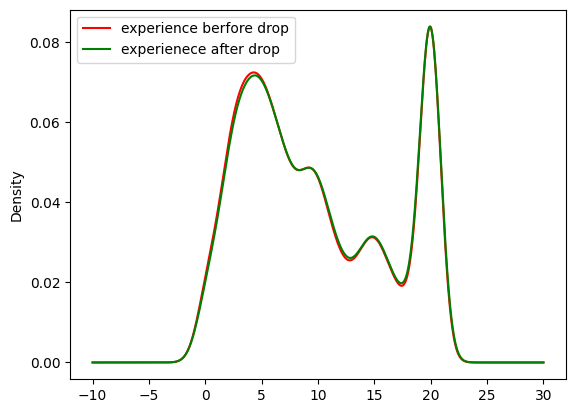

In [117]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['experience'].plot.density(color='red')

row_drop_df['experience'].plot.density(color='green')

plt.legend(['experience berfore drop','experienece after drop'])

## Catrgorical

In [118]:
temp = pd.concat([df['enrolled_university'].value_counts()/len(df),
                 row_drop_df['enrolled_university'].value_counts()/len(row_drop_df)
                 ],axis=1)

temp.columns = ['orignal','cca']
                

In [119]:
temp # check the ratio in categorical such taht before and after removal completelt at random ratio remain same.

,orignal,cca
enrolled_university,,
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [121]:
temp = pd.concat([df['education_level'].value_counts()/len(df),
                 row_drop_df['education_level'].value_counts()/len(row_drop_df)
                 ],axis=1)

temp.columns = ['orignal','cca']

In [122]:
temp

,orignal,cca
education_level,,
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587
